<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv('Cleaned_survey_dataset.csv')
df.drop(columns='Unnamed: 0', axis = 1, inplace=True)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Binned
0,1,I am a developer by profession,Under 18 years old,Employed,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.94,0-5
1,2,I am a developer by profession,35-44 years old,Employed,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.94,10-20
2,3,I am a developer by profession,45-54 years old,Employed,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.94,>20
3,4,I am learning to code,18-24 years old,Student,"Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.94,0-5
4,5,I am a developer by profession,18-24 years old,Student,"Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.94,0-5


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


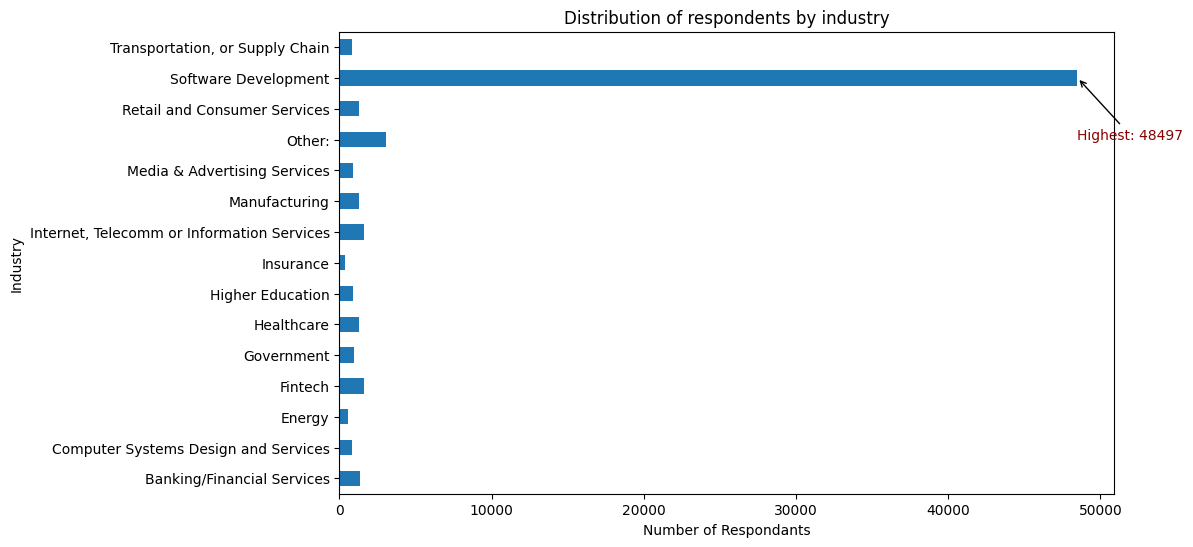

In [5]:
##Write your code here
plt.figure(figsize=(10,6)) 
bar = df.groupby('Industry')['ResponseId'].count()
max_value = max(bar.values)
max_index = bar.argmax()
bar.plot(kind='barh') 
plt.annotate(
    f'Highest: {max_value}',  # Annotation text
    xy=(max_value, max_index),  # Coordinates of the point to annotate
    xytext=(max_value, max_index-2),  # Position of the annotation text
    arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
    fontsize=10,
    color='darkred'
)
plt.title('Distribution of respondents by industry') 
plt.xlabel('Number of Respondants')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [18]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].astype(int)

In [28]:
##Write your code here
df['ConvertedCompYearly'].describe().round(2)

count       65437.00
mean        86155.10
std        111761.36
min             1.00
25%         86155.00
50%         86155.00
75%         86155.00
max      16256603.00
Name: ConvertedCompYearly, dtype: float64

In [21]:
df[['ResponseId','ConvertedCompYearly']].loc[df['ConvertedCompYearly'] > df['ConvertedCompYearly'].mean()]

,ResponseId,ConvertedCompYearly
379,380,91295
389,390,110000
392,393,161044
395,396,121018
398,399,195000
...,...,...
41165,41166,120000
41167,41168,100000
41184,41185,170000
41185,41186,116844


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


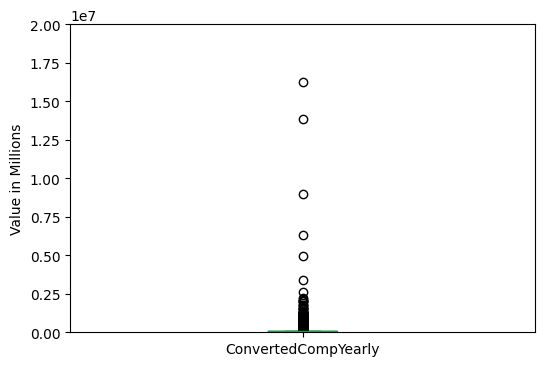

In [33]:
##Write your code here
plt.figure(figsize=(6,4)) 
df['ConvertedCompYearly'].plot(kind='box')
plt.ylim(0,20000000)
plt.ylabel('Value in Millions')
plt.show()

In [40]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 =df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

IQR

np.float64(0.0)

In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
#as we have filled the missing value with the mean value now IQR is zero and lower, upper bounds are same

Lower bound: 86155.0, Upper bound: 86155.0


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [44]:
##Write your code here
outlier = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)] 
outlier

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Binned
72,73,I am a developer by profession,18-24 years old,Employed,"Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.00000,100.000000,100.000000,50.000000,90.000000,Too long,Easy,7322,10.00,0-5
374,375,"I am not primarily a developer, but I write co...",25-34 years old,Employed,"Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Neither easy nor difficult,30074,6.94,5-10
379,380,I am a developer by profession,35-44 years old,Employed,Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Too long,Difficult,91295,10.00,5-10
385,386,I am a developer by profession,35-44 years old,Independent contractor,Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,53703,6.94,10-20
389,390,I am a developer by profession,25-34 years old,Employed,Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.00000,5.000000,20.000000,10.000000,5.000000,Too long,Easy,110000,10.00,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,Employed,In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Neither easy nor difficult,44640,6.94,0-5
41184,41185,I am a developer by profession,45-54 years old,Employed,"Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,10.00000,20.000000,15.000000,0.000000,0.000000,Appropriate in length,Easy,170000,9.00,>20
41185,41186,I am a developer by profession,35-44 years old,Employed,Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,116844,6.94,10-20
41186,41187,I am a developer by profession,18-24 years old,Student,"Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,25.00000,15.000000,5.000000,5.000000,0.000000,Appropriate in length,Easy,12000,3.00,0-5


In [46]:
df_new = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)] 
df_new

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Binned
0,1,I am a developer by profession,Under 18 years old,Employed,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155,6.94,0-5
1,2,I am a developer by profession,35-44 years old,Employed,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155,6.94,10-20
2,3,I am a developer by profession,45-54 years old,Employed,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155,6.94,>20
3,4,I am learning to code,18-24 years old,Student,"Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155,6.94,0-5
4,5,I am a developer by profession,18-24 years old,Student,"Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155,6.94,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,Employed,Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155,6.94,0-5
65433,65434,I am a developer by profession,25-34 years old,Employed,Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155,6.94,0-5
65434,65435,I am a developer by profession,25-34 years old,Employed,In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155,6.94,0-5
65435,65436,I am a developer by profession,18-24 years old,Employed,"Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155,6.94,0-5


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [63]:
##Write your code here
df['Age'] = df['Age'].replace({'25-34 years old' : 30, '35-44 years old': 40, '18-24 years old': 21, '45-54 years old':50, '55-64 years old':60, 
                               'Under 18 years old':10, '65 years or older':65, 'Prefer not to say': 0})

/tmp/ipykernel_2075/4102156215.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({'25-34 years old' : 30, '35-44 years old': 40, '18-24 years old': 21, '45-54 years old':50, '55-64 years old':60,


In [69]:
from pandas.api.types import is_numeric_dtype

In [74]:
for col in df.columns: 
    if is_numeric_dtype(df[col]):
        print(df[[col, 'Age']].corr())

            ResponseId       Age
ResponseId    1.000000 -0.039424
Age          -0.039424  1.000000
     Age  Age
Age  1.0  1.0
Age  1.0  1.0
              YearsCodePro       Age
YearsCodePro      1.000000  0.690346
Age               0.690346  1.000000
           CompTotal       Age
CompTotal   0.000000 -0.001617
Age        -0.001617  1.000000
          WorkExp       Age
WorkExp  1.000000  0.464204
Age      0.464204  1.000000
                JobSatPoints_1       Age
JobSatPoints_1        1.000000 -0.014409
Age                  -0.014409  1.000000
                JobSatPoints_4       Age
JobSatPoints_4        1.000000 -0.041565
Age                  -0.041565  1.000000
                JobSatPoints_5       Age
JobSatPoints_5        1.000000 -0.055325
Age                  -0.055325  1.000000
                JobSatPoints_6       Age
JobSatPoints_6        1.000000 -0.026036
Age                  -0.026036  1.000000
                JobSatPoints_7      Age
JobSatPoints_7         1.00000 -0.04495

In [75]:
df_new.to_csv('Newdata_with_noOutiers_of_ConvertedCompYearly.csv')

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
